In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/metro-systems-worldwide/Metro-Systems-Worldwide.csv


In [2]:
df = pd.read_csv('/kaggle/input/metro-systems-worldwide/Metro-Systems-Worldwide.csv')
df.head()

,City,Country\r\nregion,Name,Service\r\nopened,Last\r\nexpanded,Stations,System length,Annual ridership\r\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [3]:
df.columns.tolist()

['City',
 'Country\r\nregion',
 'Name',
 'Service\r\nopened',
 'Last\r\nexpanded',
 'Stations',
 'System length',
 'Annual ridership\r\n(millions)']

In [4]:
#Lets rename columns
df.rename(columns = {'Country\r\nregion' : 'Country',
                     'Service\r\nopened' : 'Service_opened',
                     'Last\r\nexpanded' :  'Last_expanded',
                     'System length' : 'System_length',
                     'Annual ridership\r\n(millions)' : 'Annual_riders(millions)'}, inplace = True)
df.head()

,City,Country,Name,Service_opened,Last_expanded,Stations,System_length,Annual_riders(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)


In [5]:
# For removing the km and (.... mil) values from the System_length column
df['System_length'] = df['System_length'].apply(lambda x: float(x.split()[0]))

In [6]:
# For removing (year) values from the Annual_riders column
df['Annual_riders(millions)'] = df['Annual_riders(millions)'].apply(lambda x: str(x).split("(")[0].strip())

# For removing "," in the values for converting string to float
for index, row in df.iterrows():
    value = row['Annual_riders(millions)']
    value = value.replace(",", "") 
    df.at[index, 'Annual_riders(millions)'] = value 

# Since we convert these values to string we have to convert them to float
df['Annual_riders(millions)'] = df['Annual_riders(millions)'].astype(float)
df.head()

,City,Country,Name,Service_opened,Last_expanded,Stations,System_length,Annual_riders(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5,45.3
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7,74.0
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1,23.3
3,Sydney,Australia,Sydney Metro,2019,–,13,36.0,16.3
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3,459.8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     205 non-null    object 
 1   Country                  205 non-null    object 
 2   Name                     205 non-null    object 
 3   Service_opened           205 non-null    int64  
 4   Last_expanded            205 non-null    object 
 5   Stations                 205 non-null    int64  
 6   System_length            205 non-null    float64
 7   Annual_riders(millions)  189 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.9+ KB


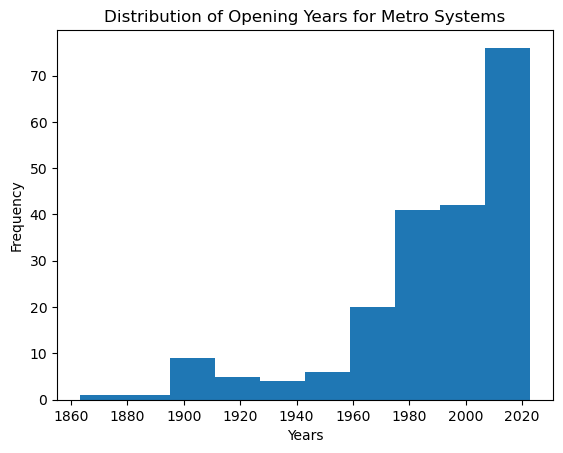

In [8]:
plt.hist(df['Service_opened'], bins = 10)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Years for Metro Systems')
plt.show()

**As can be seen from the histogram most of the metro services were opened between 2000-2020**

In [9]:
import plotly.express as px

fig = px.choropleth(df, locations = 'Country', locationmode = 'country names',
                    color = 'Country', hover_name = 'Country', 
                    title = 'Countries with Subway Services')

fig.update_layout(title_text = "Countries with Subway Services")

fig.show()

In [10]:
oldest_subways = df.nsmallest(5, 'Service_opened')
newest_subways = df.nlargest(5, 'Service_opened')

fig1 = px.scatter(oldest_subways, x = 'Name', y = 'Service_opened',
                 title='Oldest Subways',
                 labels={'Subway Opened': 'Year', 'Station': 'Name'})

fig1.show()

fig2 = px.scatter(newest_subways, x = 'Name', y = 'Service_opened',
                 title = 'Newest Subways',
                 labels={'Subway Opened': 'Year', 'Station': 'Name'})
fig2.show()

**As can be seen from the scatter plot, oldest subway service is London Underground which opened in 1863. Newest subway lines are Quito Metro, Karaj Metro and Lagos Rail Mass Transit. They were made in 2023.**

In [11]:
biggest_subways = df.nlargest(5, 'Stations')
smallest_subways = df.nsmallest(5, 'Stations')

merged_data = pd.concat([biggest_subways, smallest_subways])

fig = px.scatter(merged_data, x = 'Name', y = 'Stations',
                 size = 'Stations', title = 'Metro Lines - Most and Fewest Stations')

fig.update_layout(title_text = 'Metro Lines - Most and Fewest Stations')
fig.update_xaxes(title = 'Metro Lines')
fig.update_yaxes(title = 'Number of Stations')

fig.show()

**As can be seen from the bubble chart, the New York City Subway is the largest subway with 424 stations, followed by the Shanghai Metro, which has 403 stations. The smallest subway service is the Karaj Metro in Iran, which only has 2 stations**

In [12]:
import plotly.graph_objects as go
import plotly.subplots as sp

longest_subways = df.nlargest(5, 'System_length')
shortest_subways = df.nsmallest(5, 'System_length')

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("Shortest Metro Networks", "Longest Metro Networks"))

fig.add_trace(go.Scatter(x = shortest_subways['Name'], y = shortest_subways['System_length'],
                         mode = 'markers+lines',
                         marker = dict(size = 10),
                         name = 'Shortest Metro Networks'), row = 1, col = 1)

fig.add_trace(go.Scatter(x = longest_subways['Name'], y = longest_subways['System_length'],
                         mode = 'markers+lines',
                         marker = dict(size = 10),
                         name = 'Longest Metro Networks'), row = 1, col = 2)

fig.update_layout(title = 'Shortest and Longest Metro Networks', xaxis_title = 'Subway Name', yaxis_title = 'Length (km)')

fig.show()

**According to the above graph, Minatomirai Line in Japan is the shortest subway with 4.1 km system length. Shanghai Metro has the longest subway service line with around 795.5 km**

In [13]:
most_crowded_subways = df.nlargest(5, 'Annual_riders(millions)')
least_crowded_subways = df.nsmallest(5, 'Annual_riders(millions)')

fig = sp.make_subplots(rows = 1, cols = 2, subplot_titles = ("Most Crowded Metro Services", "Least Crowded Metro Services"))

fig.add_trace(go.Scatter(x = most_crowded_subways['Name'], y = most_crowded_subways['Annual_riders(millions)'],
                         mode = 'markers+lines',
                         marker = dict(size = 10),
                         name = 'Most Crowded Metro Services'), row = 1, col = 1)

fig.add_trace(go.Scatter(
    x = least_crowded_subways['Name'],
    y = least_crowded_subways['Annual_riders(millions)'],
    mode = 'markers',
    marker = dict(size = least_crowded_subways['Annual_riders(millions)'],
                  sizemode = 'diameter',
                  sizeref = 0.1,
                  sizemin = 3,
                  color = 'green')), row = 1, col = 2)

fig.update_layout(
    title = 'Metro Networks Comparison', xaxis = dict(title = 'Metro Names'), yaxis = dict(title = 'Passengers (millions)'), showlegend = False)

fig.show()